In [1]:
import numpy as np 
import pandas as pd 
import dataPrep as dP

In [2]:
#Get the required data 
x_train,y_train = dP.getTrainingData()
testImages,testLabels = dP.getTestingData()
print(x_train.shape)
print(y_train.shape)
print(testImages.shape)
print(testLabels.shape)

(27455, 784)
(27455, 1)
(7172, 784)
(7172, 1)


In [5]:
#Method 1 - Use General machine learning approaches from the sci-kit library 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
dt = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=42, n_jobs=2)
svcModel = SVC(gamma = 0.001)
classifiersList = [dt,rfc,svcModel]
classifiersScores = []
classifiersTrainTimes = []
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.25,random_state = 42)

In [7]:
#Train different models and store the results 
from time import time
def trainPredict(model,sampleSize,x_train,y_train,x_test,y_test):
    '''
    model: The algorithm
    sampleSize: The size of samples to draw from
    x_train: Training dataset
    y_train: Labels 
    x_test: Test set
    y_test: Test labels
    '''
    results = {}
    start = time()
    learner = model.fit(x_train[:sampleSize],y_train[:sampleSize])
    end = time()
    results['training_time'] = end - start
    
    #Predictions 
    start = time()
    predictions_test = learner.predict(x_test)
    end = time()
    results['testing_time'] = end - start
    results['acc_train'] = accuracy_score(y_train[:5000],learner.predict(x_train[:5000]))
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    print ("{} trained on {} samples.".format(model.__class__.__name__, sampleSize))
    results['clf_name'] = model.__class__.__name__
    return results

#Lists to store results and plot values 
clf_ltrain_times = []
clf_lnames = []
clf_testAccuracies = []
clf_trainAccuracies = []

for model in classifiersList:
    clfResults = trainPredict(model,len(y_train),x_train,y_train,x_test,y_test)
    clf_ltrain_times.append(clfResults['training_time'])
    clf_testAccuracies.append(clfResults['acc_test'])
    clf_trainAccuracies.append(clfResults['acc_train'])
    clf_lnames.append(clfResults['clf_name'].replace('Classifier', ''))
print(clf_ltrain_times)
print("\n")
print(clf_testAccuracies)
print("\n")
print(clf_lnames)

DecisionTreeClassifier trained on 20591 samples.


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier trained on 20591 samples.


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC trained on 20591 samples.
[14.208499908447266, 20.055097818374634, 399.62336897850037]


[0.8751456876456877, 0.9976689976689976, 0.7514568764568764]


['DecisionTree', 'RandomForest', 'SVC']


In [9]:
#Let's predict on new data and calculate the accuracies. 
untested = []
for model in classifiersList:
    print("Predicting using model {}".format(model))
    preds = model.predict(testImages)
    acc = accuracy_score(testLabels,preds)
    untested.append(acc)
    print(accuracy_score(testLabels,preds))
    print("\n")

Predicting using model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
0.44645844952593416


Predicting using model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=42, verbose=0,
       

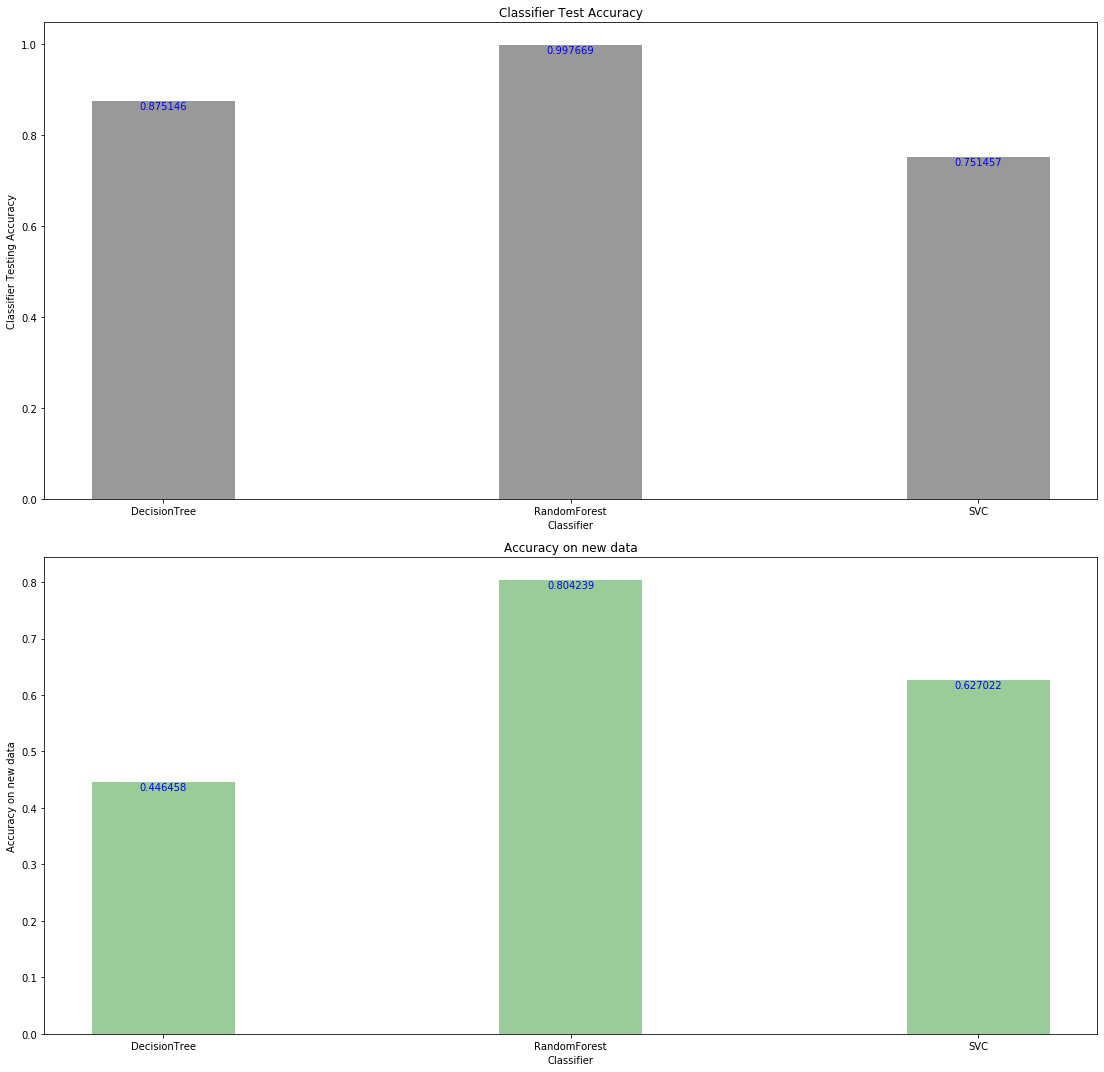

In [10]:
#Plot the results 
import matplotlib.pyplot as plt 
plt.figure(1,figsize = (45,15))
nGroups = len(clf_testAccuracies)
index = np.arange(nGroups)
barWidth = 0.35
opacity = 0.4
data1 = clf_testAccuracies
data2 = untested
plt.subplot(2,3,1)
plt.xlabel('Classifier')
plt.ylabel('Classifier Testing Accuracy')
plt.title('Classifier Test Accuracy')
plt.xticks(index, clf_lnames)
bar1 = plt.bar(index, data1, barWidth, alpha=opacity, color='k')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.subplot(2,3,4)
plt.xlabel('Classifier')
plt.ylabel('Accuracy on new data')
plt.title('Accuracy on new data')
plt.xticks(index, clf_lnames)
bar2 = plt.bar(index, data2, barWidth, alpha=opacity, color='g')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.tight_layout()
plt.show()

In [ ]:
#Model tuning
#To be continued 
